<a href="https://colab.research.google.com/github/nickmirunsw/py-learning/blob/main/tensorflow/tfnm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CHATGPT CHEATSHEET FOR TENSORFLOW***



In [ ]:
# chatgpt cheatsheet and example

# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt

# # 1. Core TensorFlow Operations
# print("\n### Core TensorFlow Operations ###")
# constant_tensor = tf.constant([1, 2, 3], dtype=tf.float32, name="my_constant")
# variable_tensor = tf.Variable(initial_value=[4, 5, 6], trainable=True, dtype=tf.float32, name="my_variable")

# print("Constant:", constant_tensor.numpy())
# print("Variable:", variable_tensor.numpy())

# # 2. Keras Model Building
# print("\n### Keras Model Building ###")
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=128, activation='relu', input_shape=(64,), name="dense_1"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_1"),
#     tf.keras.layers.Dropout(rate=0.2, name="dropout_1"),
#     tf.keras.layers.Dense(units=64, activation='relu', name="dense_2"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_2"),
#     tf.keras.layers.Dense(units=10, activation='softmax', name="output")
# ], name="sequential_model")

# model.summary()

# # 3. Model Compilation
# print("\n### Model Compilation ###")
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )

# # 4. Data Preprocessing
# print("\n### Data Preprocessing ###")
# x_train = np.random.rand(1000, 64)  # Dummy training data (1000 samples, 64 features)
# y_train = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(1000,)), num_classes=10)

# x_val = np.random.rand(200, 64)  # Validation data
# y_val = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(200,)), num_classes=10)

# # Normalize data (common preprocessing step)
# x_train = (x_train - np.mean(x_train)) / np.std(x_train)
# x_val = (x_val - np.mean(x_val)) / np.std(x_val)

# # 5. Model Training with Callbacks
# print("\n### Model Training ###")
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=3, restore_best_weights=True, verbose=1
# )
# history = model.fit(
#     x=x_train,
#     y=y_train,
#     validation_data=(x_val, y_val),
#     epochs=20,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # 6. Visualizing Training History
# print("\n### Visualizing Training History ###")
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # 7. Model Evaluation
# print("\n### Model Evaluation ###")
# loss, accuracy = model.evaluate(x_val, y_val, verbose=1)
# print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# # 8. Model Prediction
# print("\n### Model Prediction ###")
# predictions = model.predict(x_val[:5])
# print("Predictions (softmax probabilities):", predictions)

# # 9. Transfer Learning with Pretrained Models
# print("\n### Transfer Learning ###")
# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=(128, 128, 3),
#     include_top=False,
#     weights='imagenet'
# )
# base_model.trainable = False

# transfer_model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# transfer_model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )
# transfer_model.summary()

# # Dummy image data
# x_train_images = np.random.rand(100, 128, 128, 3)  # 100 RGB images of size 128x128
# y_train_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(100,)), num_classes=10)

# x_val_images = np.random.rand(20, 128, 128, 3)
# y_val_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(20,)), num_classes=10)

# # Train transfer learning model
# transfer_model.fit(
#     x=x_train_images,
#     y=y_train_images,
#     validation_data=(x_val_images, y_val_images),
#     epochs=5,
#     batch_size=16
# )

# # 10. Model Saving and Loading
# print("\n### Model Saving and Loading ###")
# model.save("my_model.h5")
# loaded_model = tf.keras.models.load_model("my_model.h5")
# print("Model loaded successfully!")

# # 11. TensorFlow Dataset API
# print("\n### TensorFlow Dataset API ###")
# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# dataset = dataset.shuffle(buffer_size=100).batch(32).prefetch(tf.data.AUTOTUNE)

# for batch in dataset.take(1):
#     print("A batch of data:", batch)

# # 12. Advanced TensorFlow Features: Gradient Tape
# print("\n### Gradient Tape ###")
# x = tf.constant(3.0)
# y = tf.constant(4.0)

# with tf.GradientTape() as tape:
#     tape.watch(x)
#     z = x ** 2 + y ** 2
# gradients = tape.gradient(z, x)
# print("Gradient of z with respect to x:", gradients.numpy())


# ***TUTORIAL 7 =================================================***

In [ ]:
from ast import increment_lineno
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_test_flattened = x_test.reshape(10000, 784)
x_train_flattened = x_train.reshape(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

model.evaluate(x_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8092 - loss: 0.7185
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9126 - loss: 0.3107
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9199 - loss: 0.2839
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9230 - loss: 0.2772
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9270 - loss: 0.2625
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9150 - loss: 0.3031


[0.26618918776512146, 0.9258000254631042]

In [ ]:
y_predict = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(y_test[1])
print(np.argmax(y_predict[1]))

2
2


In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1))

Text(95.72222222222221, 0.5, 'Truth')

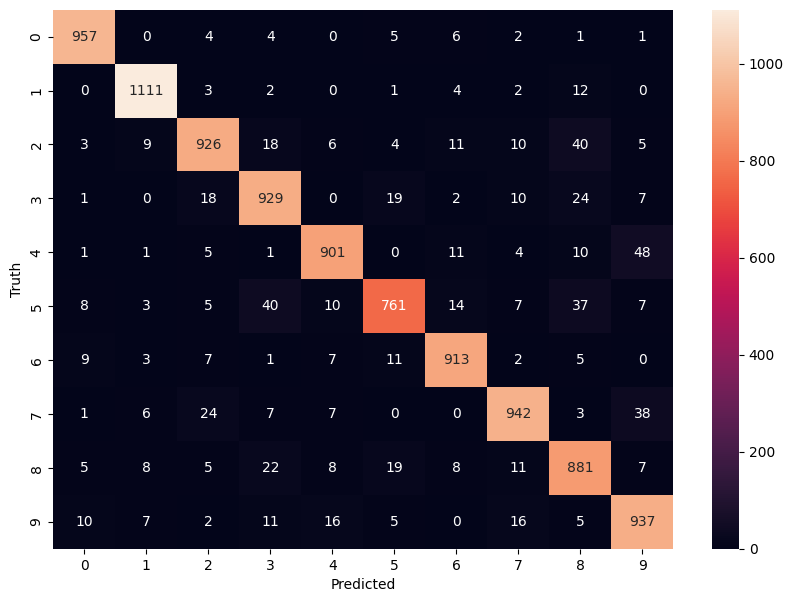

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

model.evaluate(x_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8682 - loss: 0.4535
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9639 - loss: 0.1231
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9753 - loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9802 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9856 - loss: 0.0482
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.0913


[0.07618451118469238, 0.975600004196167]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

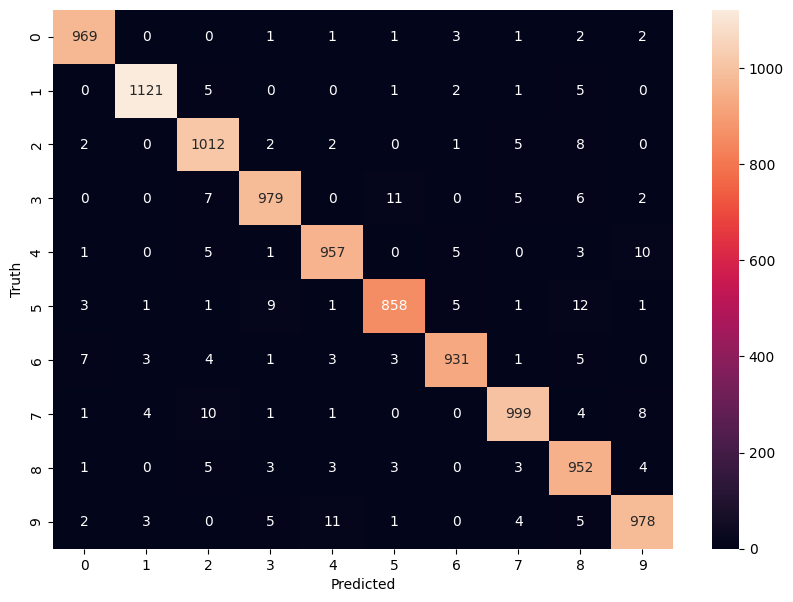

In [ ]:
y_predict = model.predict(x_test_flattened)
cm = tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1))

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

y_predict = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8739 - loss: 0.4547
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9625 - loss: 0.1290
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9739 - loss: 0.0868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9804 - loss: 0.0648
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9843 - loss: 0.0522
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0857
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


# ***TUTORIAL 8 =================================================***

In [ ]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

sigmoid(-56)

4.780892883885469e-25

In [ ]:
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

tanh(-56)

-1.0

In [ ]:
def relu(x):
  return max(0, x)

relu(-100)

0

In [ ]:
def leaky_relu(x):
  return max(0.1*x, x)

leaky_relu(-100)

-10.0

# ***TUTORIAL 10 =================================================***

In [ ]:
revenue = np.array([[180, 200, 220], [24, 36, 40], [12, 18, 20]])
expenses = np.array([[80, 90, 100], [10, 16, 20], [8, 10, 10]])

In [ ]:
profit = revenue - expenses
print(profit)

[[100 110 120]
 [ 14  20  20]
 [  4   8  10]]


In [ ]:
price_per_unit = np.array([1000, 400, 1200])
units = np.array([[30, 30, 50], [5, 10, 15], [2, 5, 7]])
sales = np.dot(price_per_unit,units)
print(sales)

[34400 40000 64400]


# ***TUTORIAL 11 =================================================***

In [ ]:
y_predicted = np.array([1, 1, 0, 0, 1])
y_true = np.array([0.30, 0.70, 1, 0, 0.5])

In [ ]:
def mae(y_predicted, y_true):
  return np.average(np.abs(y_predicted - y_true))

mae(y_predicted, y_true)


0.5

In [ ]:
def log_loss(y_predicted, y_true):
    # Clip predicted values to avoid log(0)
    y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)

    # Correct log loss formula
    return -np.average(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))

log_loss(y_predicted, y_true)

17.2696280766844

In [ ]:
def mse(y_predicted, y_true):
  return np.mean(np.power((y_predicted - y_true), 2))

mse(y_predicted, y_true)

0.366

# ***TUTORIAL 12 =================================================***

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/6_gradient_descent/insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
df['age'] = df['age'] /(df['age'].max())

In [ ]:
df.head()

,age,affordibility,bought_insurance
0,0.354839,1,0
1,0.403226,0,0
2,0.758065,1,1
3,0.838710,0,0
4,0.741935,1,1


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df.bought_insurance, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 22
Testing set size: 6


In [ ]:
print(X_train)

         age  affordibility
17  0.935484              1
22  0.645161              1
11  0.451613              1
13  0.467742              0
15  0.887097              1
1   0.403226              0
4   0.741935              1
5   0.903226              1
2   0.758065              1
16  0.403226              0
23  0.725806              1
3   0.838710              0
26  0.370968              1
24  0.806452              1
18  0.306452              0
27  0.741935              1
20  0.338710              1
7   0.967742              0
10  0.290323              1
14  0.790323              1
19  0.290323              1
6   0.887097              0


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step - accuracy: 0.5000 - loss: 0.7806
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.7801
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5000 - loss: 0.7795
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5000 - loss: 0.7790
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.7784
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7779
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7773
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7768
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.7763
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.7757
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.7752
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - l

In [ ]:
y_predict = model.predict(X_test)
y_predict = np.round(y_predict, 2)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.71],
       [0.69],
       [0.71],
       [0.47],
       [0.61],
       [0.47]], dtype=float32)

In [ ]:
print(y_test)

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64


In [ ]:
coef, intercept = model.get_weights()
print(coef)
print(intercept)

[[0.68153673]
 [0.627274  ]]
[-0.40538993]


In [ ]:
def prediction_function(age, affordibility):
  weighted_sum =  age * coef[0] + affordibility * coef[1] + intercept
  return sigmoid(weighted_sum)


In [ ]:
X_test

,age,affordibility
9,0.983871,1
25,0.870968,1
8,1.000000,1
21,0.419355,0
0,0.354839,1
12,0.435484,0


In [ ]:
prediction_function(0.983, 1)

<ipython-input-15-1aa4ded09e79>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.709268627899353

In [ ]:
def log_loss(y_predicted, y_true):
    # Clip predicted values to avoid log(0)
    y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)
    return np.average(
        -y_true * np.log(y_predicted) - (1 - y_true) * np.log(1 - y_predicted)
    )

In [ ]:
def numpy_sigmoid(X):
  return 1/(1+np.exp(-X))

In [ ]:
def gradient_descent(age, affordibility, y_true, epochs):
  w1 = w2 = 1
  bias = 0
  epochs = epochs
  rate = 0.5
  n = len(age)

  for i in range(1, epochs):
    y_p = age * w1 + affordibility * w2 + bias
    y_p_sigmoid = numpy_sigmoid(y_p)
    loss = log_loss(y_p_sigmoid, y_train)
    print(f'loss at epoch:{i} is {loss:2f}')
    print(f'w1 = {w1:2f}, w2 = {w2:2f}, bias = {bias:2f}')
    w1 = w1 - rate * (np.dot(age, np.transpose(y_p_sigmoid - y_true)))*(1/n)
    w2 = w2 - rate * (np.dot(affordibility, np.transpose(y_p_sigmoid - y_true)))*(1/n)
    bias = bias - rate * np.mean(y_p_sigmoid - y_true)
    epochs += 1

  return w1, w2, bias


In [ ]:
print(X_train['age'].shape)
print(X_train['affordibility'].shape)
print(y_train.shape)

(22,)
(22,)
(22,)


In [ ]:
gradient_descent(X_train['age'], X_train['affordibility'], y_train, 50)

loss at epoch:1 is 0.780631
w1 = 1.000000, w2 = 1.000000, bias = 0.000000
loss at epoch:2 is 0.727557
w1 = 0.943324, w2 = 0.919572, bias = -0.137722
loss at epoch:3 is 0.689616
w1 = 0.898493, w2 = 0.851892, bias = -0.256407
loss at epoch:4 is 0.663493
w1 = 0.864898, w2 = 0.796607, bias = -0.357168
loss at epoch:5 is 0.645963
w1 = 0.841406, w2 = 0.752669, bias = -0.441888
loss at epoch:6 is 0.634333
w1 = 0.826614, w2 = 0.718623, bias = -0.512842
loss at epoch:7 is 0.626581
w1 = 0.819060, w2 = 0.692880, bias = -0.572349
loss at epoch:8 is 0.621297
w1 = 0.817378, w2 = 0.673914, bias = -0.622557
loss at epoch:9 is 0.617550
w1 = 0.820374, w2 = 0.660369, bias = -0.665334
loss at epoch:10 is 0.614747
w1 = 0.827048, w2 = 0.651098, bias = -0.702235
loss at epoch:11 is 0.612520
w1 = 0.836582, w2 = 0.645158, bias = -0.734524
loss at epoch:12 is 0.610644
w1 = 0.848327, w2 = 0.641796, bias = -0.763207
loss at epoch:13 is 0.608981
w1 = 0.861769, w2 = 0.640415, bias = -0.789077
loss at epoch:14 is 0.

(1.5109570260949845, 0.7760497086503022, -1.3771108839746358)

# ***TUTORIAL 13 =================================================***

In [ ]:
class myNN:
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.bias = 0

  def gradient_descent(self, age, affordibility, y_true, epochs):
    w1 = w2 = 1
    bias = 0
    epochs = epochs
    rate = 0.5
    n = len(age)

    for i in range(1, epochs):
      y_p = age * w1 + affordibility * w2 + bias
      y_p_sigmoid = numpy_sigmoid(y_p)
      loss = log_loss(y_p_sigmoid, y_train)
      if i%40 == 0:
        print(f'loss at epoch:{i} is {loss:2f}')
        print(f'w1 = {w1:2f}, w2 = {w2:2f}, bias = {bias:2f}')
      w1 = w1 - rate * (np.dot(age, np.transpose(y_p_sigmoid - y_true)))*(1/n)
      w2 = w2 - rate * (np.dot(affordibility, np.transpose(y_p_sigmoid - y_true)))*(1/n)
      bias = bias - rate * np.mean(y_p_sigmoid - y_true)
      epochs += 1

    return w1, w2, bias

  def fit(self, X, y, epochs):
    self.w1, self.w2, self.bias = self.gradient_descent(X['age'], X['affordibility'], y, epochs)

  def predict(self, X_test):
    weighted_sum =  self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias
    return numpy_sigmoid(weighted_sum)

In [ ]:
Custom_model = myNN()
Custom_model.fit(X_train, y_train, 400)

loss at epoch:40 is 0.576203
w1 = 1.339116, w2 = 0.740447, bias = -1.237561
loss at epoch:80 is 0.540938
w1 = 1.988528, w2 = 0.862759, bias = -1.755454
loss at epoch:120 is 0.515902
w1 = 2.543731, w2 = 0.950109, bias = -2.185270
loss at epoch:160 is 0.497708
w1 = 3.018626, w2 = 1.020830, bias = -2.550405
loss at epoch:200 is 0.484223
w1 = 3.426809, w2 = 1.082462, bias = -2.865539
loss at epoch:240 is 0.474049
w1 = 3.779976, w2 = 1.138165, bias = -3.140653
loss at epoch:280 is 0.466249
w1 = 4.087696, w2 = 1.189332, bias = -3.382957
loss at epoch:320 is 0.460186
w1 = 4.357653, w2 = 1.236639, bias = -3.597884
loss at epoch:360 is 0.455412
w1 = 4.595994, w2 = 1.280480, bias = -3.789658


In [ ]:
Custom_model.predict(X_test)

,0
9,0.889888
25,0.824451
8,0.897260
21,0.125042
0,0.281999
12,0.133775


# ***TUTORIAL 14 =================================================***

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/8_sgd_vs_gd/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [ ]:
scaled_x = sx.fit_transform(df[['area', 'bedrooms']])

In [ ]:
scaled_y = sy.fit_transform(df[['price']])

In [ ]:
print(scaled_x[0:3])
print(scaled_y[0:3])

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]]
[[0.05237037]
 [0.65185185]
 [0.22222222]]


In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  total_samples = X.shape[0]
  w = np.ones(shape=(number_of_features))
  b = 0
  loss_list = []
  epoch_list = []

  for i in range(epochs):

    y_predicted = np.dot(w, np.transpose(X)) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*(np.sum(y_true-y_predicted))

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    loss = mse(y_predicted, scaled_y)

    if i%10:
      loss_list.append(loss)
      epoch_list.append(i)


  return w, b, loss, loss_list, epoch_list


In [ ]:
weights, bias, loss, yy, xx = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), epochs = 500, learning_rate = 0.01)

In [ ]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

print(predict(2600,4,weights,bias))
print(predict(1000,2,weights,bias))
print(predict(1500,3,weights,bias))

128.45484403267596
30.253094462442355
69.47860785714694


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


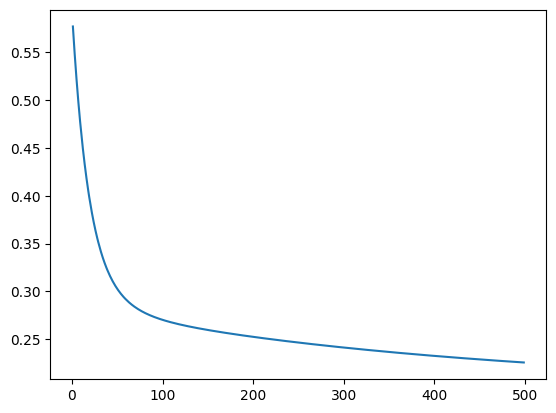

In [ ]:
plt.plot(xx, yy)

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  total_samples = X.shape[0]
  w = np.ones(shape=(number_of_features))
  b = 0
  loss_list = []
  epoch_list = []

  for i in range(epochs):

    random_sample_id = np.random.randint(0, total_samples)
    y_predicted = np.dot(w, X[random_sample_id]) + b

    w_grad = -2 * X[random_sample_id] * (y_true[random_sample_id] - y_predicted)
    b_grad = -2 * (y_true[random_sample_id] - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    loss = mse(y_predicted, y_true[random_sample_id])

    if i%10:
      loss_list.append(loss)
      epoch_list.append(i)


  return w, b, loss, loss_list, epoch_list


In [ ]:
weights, bias, loss, yy, xx = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), epochs = 1000, learning_rate = 0.01)

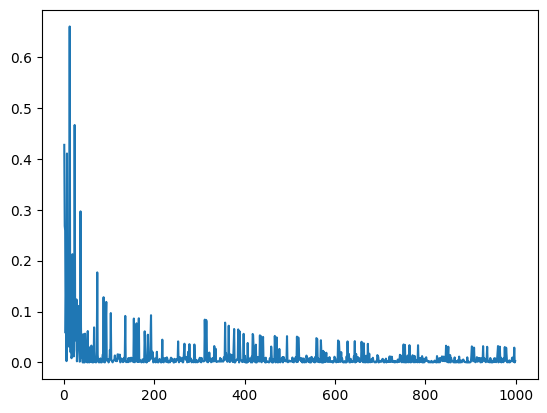

In [ ]:
plt.plot(xx, yy)

In [ ]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

print(predict(2600,4,weights,bias))
print(predict(1000,2,weights,bias))
print(predict(1500,3,weights,bias))

124.99970925660064
35.791710330486076
71.19843072351951


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    total_samples = X.shape[0]
    batch_size = round(total_samples / 3)

    w = np.ones(shape=(number_of_features))
    b = 0
    loss_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = np.random.choice(total_samples, batch_size, replace=False)
        X_batch = X[random_index]
        y_batch = y_true[random_index]

        y_predicted = np.dot(X_batch, w) + b

        w_grad = (2/batch_size) * X_batch.T.dot(y_predicted - y_batch)
        b_grad = (2/batch_size) * np.sum(y_predicted - y_batch)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        loss = mse(y_predicted, y_batch)

        if i % 10 == 0:
            loss_list.append(loss)
            epoch_list.append(i)

    return w, b, loss, loss_list, epoch_list


In [ ]:
weights, bias, loss, yy, xx = mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]), epochs=1000, learning_rate=0.01)

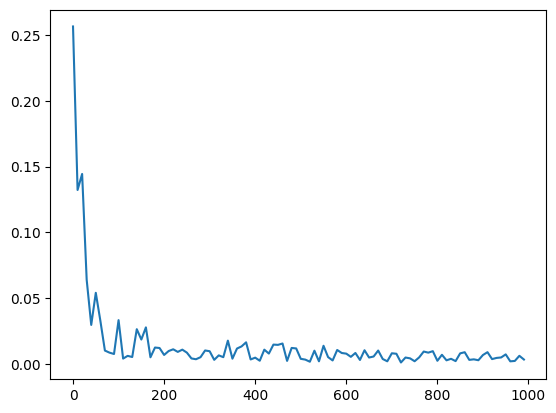

In [ ]:
plt.plot(xx, yy)

# ***TUTORIAL 16 (tensorboard skipped) =================================================***

# ***TUTORIAL 17=================================================***

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10,)
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)

In [ ]:
y_train_categorical[0:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
y_train[0:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=5)

model.evaluate(X_test_scaled, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.3085 - loss: 1.9332
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 84ms/step - accuracy: 0.4183 - loss: 1.6513
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.4568 - loss: 1.5513
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 85ms/step - accuracy: 0.4790 - loss: 1.4839
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 85ms/step - accuracy: 0.4935 - loss: 1.4390
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4772 - loss: 1.4802


[1.4848477840423584, 0.4738999903202057]

In [ ]:
y_predicted = model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


In [ ]:
print(y_predicted[212].argmax())
print(y_test[212][0])
print("=================================")

print(y_predicted[5].argmax())
print(y_test[5][0])
print("=================================")

print(y_predicted[313].argmax())
print(y_test[313][0])
print("=================================")

print(y_predicted[28].argmax())
print(y_test[28][0])
print("=================================")

print(y_predicted[57].argmax())
print(y_test[57][0])
print("=================================")

print(y_predicted[99].argmax())
print(y_test[99][0])
print("=================================")

3
5
6
6
2
0
9
9
6
7
7
7


array([[[234, 233, 238],
        [238, 237, 241],
        [239, 238, 242],
        ...,
        [246, 244, 247],
        [248, 246, 249],
        [249, 248, 251]],

       [[229, 228, 233],
        [232, 231, 236],
        [233, 232, 237],
        ...,
        [244, 242, 245],
        [246, 244, 247],
        [248, 246, 248]],

       [[231, 230, 236],
        [233, 232, 238],
        [233, 232, 238],
        ...,
        [250, 248, 250],
        [251, 249, 251],
        [252, 251, 252]],

       ...,

       [[115,  75,  55],
        [107,  72,  55],
        [106,  71,  56],
        ...,
        [226, 198, 151],
        [212, 176, 128],
        [217, 181, 131]],

       [[113,  74,  55],
        [103,  70,  55],
        [ 99,  69,  55],
        ...,
        [215, 191, 138],
        [206, 182, 128],
        [207, 177, 129]],

       [[106,  71,  54],
        [105,  72,  57],
        [103,  72,  56],
        ...,
        [203, 178, 125],
        [213, 193, 137],
        [199, 178, 127]]], dtype=uint8)
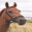

In [ ]:
X_test[99]

# ***TUTORIAL 18=================================================***

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/11_chrun_prediction/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
339,1343-EHPYB,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.40,6603,Yes
6287,3223-WZWJM,Male,0,No,No,26,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.95,2254.2,Yes
2411,6901-GOGZG,Male,0,No,Yes,60,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,4984.85,No
2488,4701-MLJPN,Male,0,No,No,31,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,55.25,1715.65,Yes
4497,0575-CUQOV,Male,1,Yes,No,60,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867,No


In [ ]:
df.drop('customerID', axis='columns', inplace=True)
df.sample(5)
print(df.dtypes)
print(df.shape)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
(7043, 20)


In [ ]:
df.TotalCharges.values
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
df1 = df[pd.to_numeric(df.TotalCharges, errors='coerce').notnull()]

In [ ]:
print(df1.shape)
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

(7032, 20)


<ipython-input-79-6c8a94d5ba3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

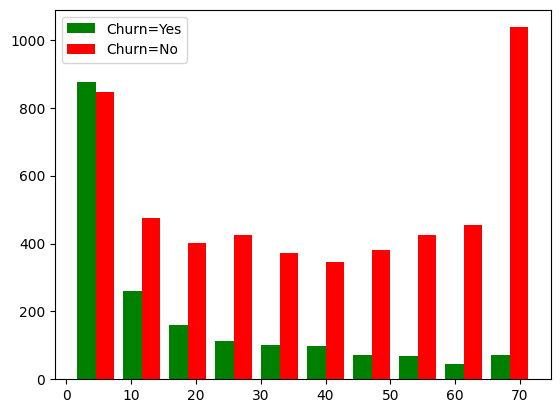

In [ ]:
plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes', 'Churn=No'], color=['green', 'red'])
plt.legend()

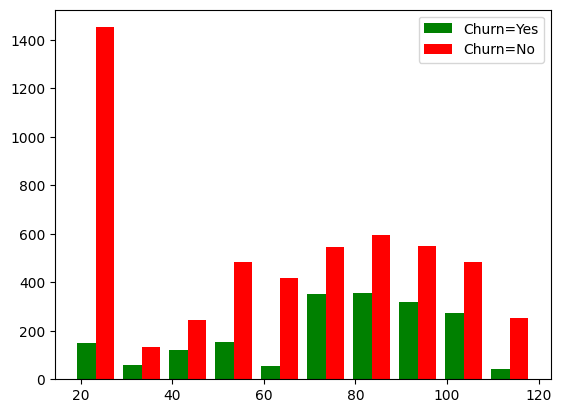

In [ ]:
tenure_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes', 'Churn=No'], color=['green', 'red'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
  for column in df:
    # if df[column].dtypes == 'object':
      print(f'{column}: {df[column].unique()}')

print_unique_col_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [ ]:
df1['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df1['Partner'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['Dependents'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['PhoneService'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 0}, inplace=True)
df1['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 0}, inplace=True)
df1['PaperlessBilling'].replace({'Yes': 1, 'No': 0}, inplace=True)
df1['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-84-42e1ef8ca89b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
<ipython-input-84-42e1ef8ca89b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
<ipython-input

In [ ]:
print_unique_col_values(df1)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df2 = pd.get_dummies(df1, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# Convert only the dummy columns to integer
df2[df2.select_dtypes('bool').columns] = df2.select_dtypes('bool').astype(int)


In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3792,0,1,0,0,26,1,0,0,0,0,...,91.25,2351.80,1,1,0,0,0,0,1,0
6792,1,0,0,0,56,1,1,0,0,0,...,24.90,1334.00,1,0,1,1,0,0,1,0
5679,1,0,0,0,8,1,1,0,0,0,...,86.55,649.65,1,1,0,0,0,0,1,0
5461,0,0,0,0,62,1,0,1,0,0,...,65.10,3846.75,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
579,1,0,0,0,0.014085,1,0,0,0,0,...,0.013930,0.002308,0,0,1,0,0,0,0,1
463,1,0,0,0,0.084507,1,1,0,1,0,...,0.811443,0.075519,1,1,0,0,0,0,1,0
4073,1,0,1,1,0.183099,1,0,1,1,0,...,0.469652,0.106024,1,0,0,0,0,0,1,0
1323,0,0,1,0,0.985915,1,1,0,0,0,...,0.063682,0.195171,0,0,1,0,1,0,0,0
5812,1,0,1,1,0.000000,1,0,0,0,0,...,0.524876,0.006024,1,1,0,0,0,0,1,0


In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(5625, 23)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(23,)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=20)

model.evaluate(X_test, y_test)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7203 - loss: 0.6021
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.7349 - loss: 0.4968
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7769 - loss: 0.4488
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7904 - loss: 0.4408
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7981 - loss: 0.4321
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8133 - loss: 0.4055
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8045 - loss: 0.4155
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8095 - loss: 0.4062
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8111 - loss: 0.4154
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8034 - loss: 0.4087
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8162 - loss: 0.4085
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/ste

[0.435202956199646, 0.7896233201026917]

In [ ]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
print(y_pred[0:20].round(0))
print("==================================")
print(y_test[0:20])



[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]]
2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
2173    0
1291    1
2579    0
6578    0
2515    0
3257    0
1976    1
132     0
5194    1
1950    1
Name: Churn, dtype: int64


In [ ]:
from sklearn.metrics import classification_report

y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to 0 or 1

print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

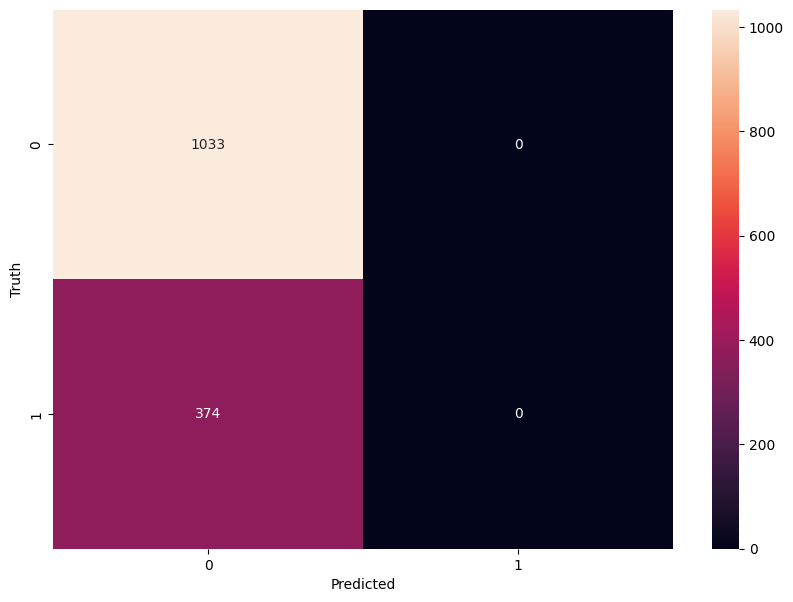

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# ***TUTORIAL 19=================================================***

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [ ]:
truth =      ["Dog","Not a dog","Dog","Dog",      "Dog", "Not a dog", "Not a dog", "Dog",       "Dog", "Not a dog"]
prediction = ["Dog","Dog",      "Dog","Not a dog","Dog", "Not a dog", "Dog",       "Not a dog", "Dog", "Dog"]

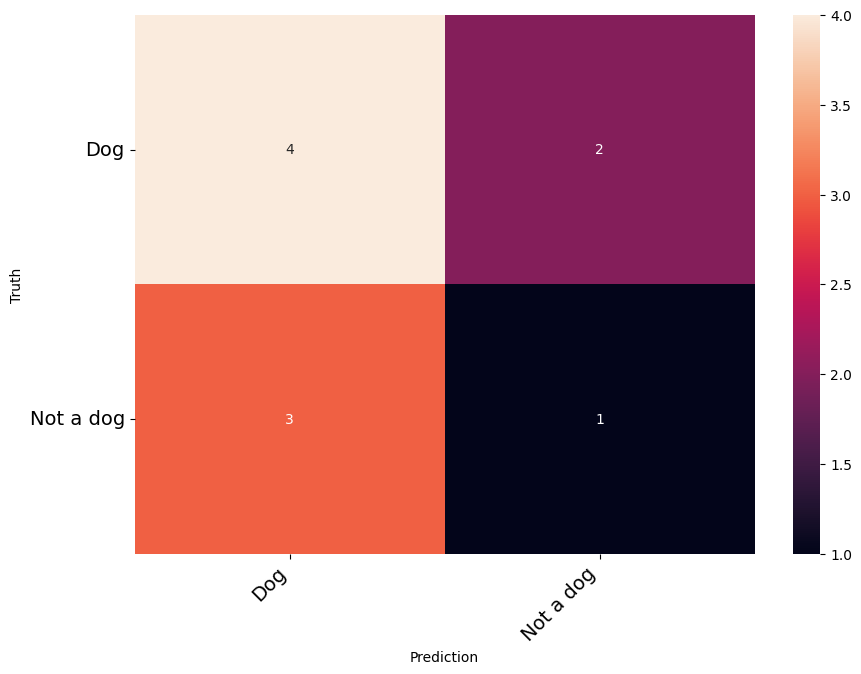

In [ ]:
import seaborn as sns
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Dog","Not a dog"])

In [ ]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

         Dog       0.57      0.67      0.62         6
   Not a dog       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



# ***TUTORIAL 20=================================================***

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/13_dropout_layer/sonar_dataset.csv", header=None)

df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
102,0.0587,0.1210,0.1268,0.1498,0.1436,0.0561,0.0832,0.0672,0.1372,0.2352,...,0.0331,0.0111,0.0088,0.0158,0.0122,0.0038,0.0101,0.0228,0.0124,M
81,0.0100,0.0194,0.0155,0.0489,0.0839,0.1009,0.1627,0.2071,0.2696,0.2990,...,0.0130,0.0073,0.0077,0.0075,0.0060,0.0080,0.0019,0.0053,0.0019,R
122,0.0249,0.0119,0.0277,0.0760,0.1218,0.1538,0.1192,0.1229,0.2119,0.2531,...,0.0027,0.0068,0.0150,0.0012,0.0133,0.0048,0.0244,0.0077,0.0074,M
94,0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,...,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,R
59,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R


In [ ]:
df.shape

(208, 61)

In [ ]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [ ]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [ ]:
df[60].value_counts()

,count
60,
M,111
R,97


In [ ]:
X = df.drop(60, axis='columns')
y = df[60]
X.shape

y = y.replace({'R': 1, 'M': 0})

<ipython-input-108-4417aa8fd9dd>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'R': 1, 'M': 0})


In [ ]:
y[0:5]

,60
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(60,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100, batch_size=8)

model.evaluate(X_test, y_test)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5410 - loss: 0.6893
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7003 - loss: 0.6670
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7112 - loss: 0.6412
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7200 - loss: 0.6143
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7404 - loss: 0.5733
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7574 - loss: 0.5634
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7589 - loss: 0.5210
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7163 - loss: 0.5530
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8185 - loss: 0.4543
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8309 - loss: 0.4146
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8198 - loss: 0.3909
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8200 - lo

[0.4284789562225342, 0.8571428656578064]

In [ ]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [ ]:
print(y_pred[0:20].round(0))
print("==================================")
print(y_test[0:20])


[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]]
161    0
15     1
73     1
96     1
166    0
9      1
100    0
135    0
18     1
148    0
171    0
30     1
155    0
180    0
125    0
197    0
164    0
190    0
84     1
75     1
Name: 60, dtype: int64


In [ ]:
from sklearn.metrics import classification_report

y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to 0 or 1

print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.78      0.88      0.82        16

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [ ]:
modeld = keras.Sequential([
    keras.layers.Flatten(input_shape=(60,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

modeld.evaluate(X_test, y_test)

y_pred = modeld.predict(X_test)

from sklearn.metrics import classification_report

y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to 0 or 1

print(classification_report(y_test, y_pred_binary))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4847 - loss: 0.7145
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5184 - loss: 0.6840 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5504 - loss: 0.7050 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4395 - loss: 0.7018
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5475 - loss: 0.6937 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5560 - loss: 0.6814 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5776 - loss: 0.6840 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4970 - loss: 0.6990 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4418 - loss: 0.7275 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5031 - loss: 0.6965 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5692 - loss: 0.6810 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        26
           1       0.64      1.00      0.78        16

    accuracy                           0.79        42
   macro avg       0.82      0.83      0.79        42
weighted avg       0.86      0.79      0.79        42



# ***TUTORIAL 21=================================================***

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/11_chrun_prediction/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6276,5003-OKNNK,Female,0,Yes,Yes,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.35,335.95,No
5163,3472-OAOOR,Male,0,Yes,Yes,19,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,34.95,610.2,No
2407,8835-VSDSE,Female,0,Yes,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.45,Yes
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,No
4273,3814-MLAXC,Female,0,No,No,31,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),79.85,2404.15,Yes


In [ ]:
df.drop('customerID',axis='columns',inplace=True)


In [ ]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
df[df.TotalCharges!=' '].shape
df1 = df[df.TotalCharges!=' ']
df1.shape
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.values
df1[df1.Churn=='No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
517400/df.shape[0]

73.46301292063042

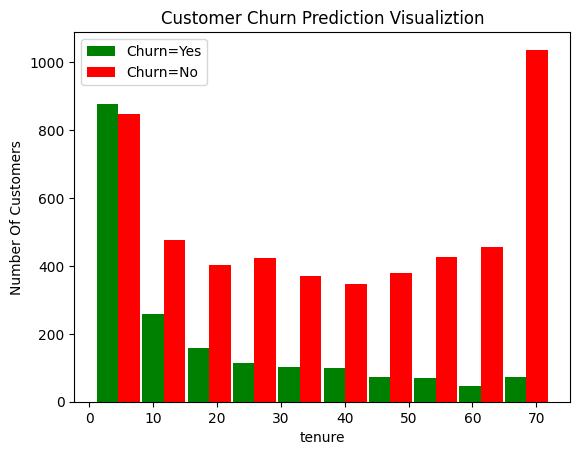

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

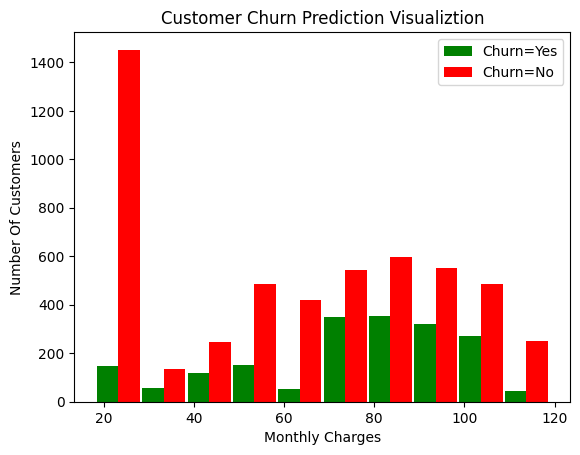

In [ ]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [ ]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
from tensorflow.keras import losses

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7083 - loss: 0.5568
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.4412
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4217
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.4207
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8074 - loss: 0.4019
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8045 - loss: 0.4118
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7953 - loss: 0.4219
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8245 - loss: 0.3887
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8025 - loss: 0.4060
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8058 - loss: 0.4056
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8181 - loss: 0.3914
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

### **Method 1 - undersampling**



In [ ]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [ ]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
0,1495
1,1495


In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6624 - loss: 0.6427
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - loss: 0.5171
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7626 - loss: 0.4971
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.4900
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.4817
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.4733
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7705 - loss: 0.4762
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7787 - loss: 0.4667
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7837 - loss: 0.4557
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7826 - loss: 0.4619
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.4549
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

### **Method 2 - Oversampling**


In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())
print(df_test_over.shape)

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64
(10326, 27)


In [ ]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [ ]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6588 - loss: 0.6152
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7637 - loss: 0.4877
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7667 - loss: 0.4774
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7738 - loss: 0.4654
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7643 - loss: 0.4755
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7743 - loss: 0.4637
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7777 - loss: 0.4698
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7787 - loss: 0.4578
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7830 - loss: 0.4483
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7751 - loss: 0.4558
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7788 - loss: 0.4572
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

### **Method 3 - SMOTE**


In [ ]:
# pip install imbalanced-learn

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6571 - loss: 0.6185
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7781 - loss: 0.4740
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - loss: 0.4658
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7881 - loss: 0.4491
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7850 - loss: 0.4525
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7854 - loss: 0.4472
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4394
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7957 - loss: 0.4416
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4368
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8006 - loss: 0.4280
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.4321
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

### **Method 4 - Ensemble with undersampling**


In [ ]:
df2.Churn.value_counts()


,count
Churn,
0,5163
1,1869


In [ ]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

,count
Churn,
0,4130
1,1495


In [ ]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [ ]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6559 - loss: 0.6410
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7704 - loss: 0.5026
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - loss: 0.4813
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.4870
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.4839
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.4848
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7777 - loss: 0.4669
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7721 - loss: 0.4663
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.4725
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.4668
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 0.4808
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6217 - loss: 0.6499
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7313 - loss: 0.5439
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7545 - loss: 0.5113
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - loss: 0.5046
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7509 - loss: 0.4913
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7657 - loss: 0.4838
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7638 - loss: 0.4896
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7743 - loss: 0.4679
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7613 - loss: 0.4756
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - loss: 0.4742
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4551
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6762 - loss: 0.6341
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7435 - loss: 0.5206
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7526 - loss: 0.5012
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7596 - loss: 0.4844
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.4723
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7797 - loss: 0.4676
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7787 - loss: 0.4781
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.4763
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.4596
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4553
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7865 - loss: 0.4634
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
len(y_pred1)

1407

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.46      0.79      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.78      0.70      0.72      1407



# ***TUTORIAL 24=================================================***

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

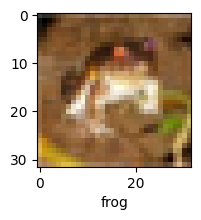

In [10]:
plot_sample(X_train, y_train, 0)


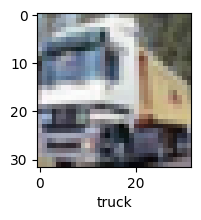

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### **Artificial Neural Network (ANN)**

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 92ms/step - accuracy: 0.3053 - loss: 1.9310
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 81ms/step - accuracy: 0.4199 - loss: 1.6393
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 80ms/step - accuracy: 0.4527 - loss: 1.5571
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.4773 - loss: 1.4890
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 82ms/step - accuracy: 0.4993 - loss: 1.4329


### **Convolutional Neural Network (CNN)**

In [14]:
cnn = models.Sequential([

        # cnn
        layers.Conv2D(filters=32, activation='relu', kernel_size=(3, 3), input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=64, activation='relu', kernel_size=(3, 3)),
        layers.MaxPooling2D((2, 2)),

        # dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.3596 - loss: 1.7460
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.5866 - loss: 1.1708
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.6424 - loss: 1.0289
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.6761 - loss: 0.9305
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.6984 - loss: 0.8622


In [15]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6846 - loss: 0.9201


[0.9345340132713318, 0.6805999875068665]

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


array([[4.0305685e-03, 8.2600646e-04, 1.9694066e-03, 5.4805952e-01,
        9.2749094e-04, 3.6043116e-01, 6.2322862e-02, 4.2328969e-04,
        1.5693508e-02, 5.3160745e-03],
       [5.3760172e-03, 2.9210633e-01, 9.7138891e-06, 4.1690600e-06,
        7.7908571e-06, 2.1141723e-07, 5.5781607e-07, 2.5598425e-07,
        7.0160466e-01, 8.9028321e-04],
       [6.8795718e-02, 2.3647362e-01, 1.3053551e-03, 4.7747199e-03,
        3.8297518e-04, 5.2850525e-04, 4.5201957e-04, 4.4303032e-04,
        6.7938966e-01, 7.4544232e-03],
       [7.5527596e-01, 1.4360968e-02, 3.4601679e-03, 5.1506545e-04,
        1.8859843e-03, 6.5736509e-05, 8.1365695e-03, 1.3550600e-05,
        2.1620929e-01, 7.6771430e-05],
       [9.9578783e-06, 1.2523781e-05, 3.9235461e-03, 1.2564971e-02,
        6.2981969e-01, 7.2451197e-03, 3.4636649e-01, 3.0824442e-05,
        1.9733172e-05, 7.2229523e-06]], dtype=float32)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

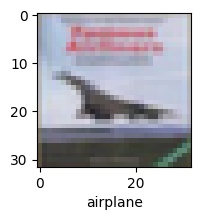

In [19]:
plot_sample(X_test, y_test,3)

In [20]:
classes[y_classes[3]]

'airplane'

In [21]:
classes[y_classes[3]]

'airplane'

# ***TUTORIAL 26=================================================***

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import os
print(data_dir)

./datasets/flower_photos


In [7]:
!ls -l ./datasets/flower_photos


total 4
drwxr-x--- 7 270850 5000 4096 Feb 10  2016 flower_photos


In [8]:
# from google.colab import files
# !zip -r flower_photos.zip ./datasets/flower_photos
# files.download("flower_photos.zip")


In [9]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [10]:
image_count = len(list(data_dir.glob('**/*.jpg')))
image_count

3670

In [11]:
roses = list(data_dir.glob('**/*roses/*'))
print(len(roses))
roses[:5]

641


[PosixPath('datasets/flower_photos/flower_photos/roses/23891005905_17ce9e6936.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5231103167_a03280e9f6_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/12395698413_c0388278f7.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/6347846935_51e3dc2481_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/7304710956_015b41f802_m.jpg')]

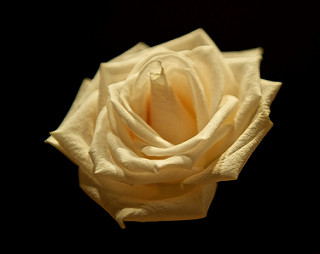

In [12]:
PIL.Image.open(roses[5])

In [13]:
tulips = list(data_dir.glob('**/*tulips/*'))
print(len(tulips))
tulips[:5]

799


[PosixPath('datasets/flower_photos/flower_photos/tulips/8555123165_2fe57eff4f.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/483880052_19fdb26a9f.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/13562271714_d534531374.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/12916441224_2ed63596f8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/7046815693_f159e96acd_n.jpg')]

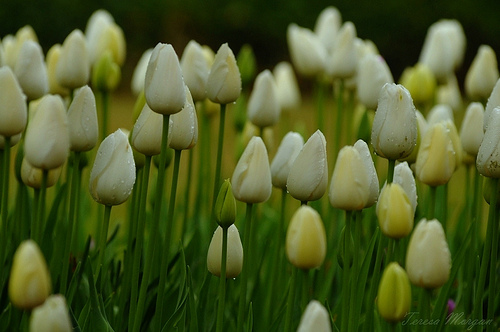

In [14]:
PIL.Image.open(tulips[5])

In [15]:
flower_images_dict= {
    'roses': list(data_dir.glob('**/*roses/*')),
    'tulips': list(data_dir.glob('**/*tulips/*')),
    'dandelion': list(data_dir.glob('**/*dandelion/*')),
    'sunflowers': list(data_dir.glob('**/*sunflowers/*')),
    'daisy': list(data_dir.glob('**/*daisy/*'))
}

In [16]:
print(flower_images_dict['roses'])

[PosixPath('datasets/flower_photos/flower_photos/roses/23891005905_17ce9e6936.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/5231103167_a03280e9f6_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/12395698413_c0388278f7.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/6347846935_51e3dc2481_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/7304710956_015b41f802_m.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/4608559939_3487bf3b62_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/14982802401_a3dfb22afb.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/15697872479_ed48e9dd73_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/15186434972_e353da940a.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/5333437251_ce0aa6925d_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/4684127262_6c33

In [17]:
flowers_labels_dict = {
    'roses': 0,
    "daisy": 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [18]:
str(flower_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/23891005905_17ce9e6936.jpg'

In [19]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
print(img)

[[[ 13  10 196]
  [  0   0 182]
  [  2   7 194]
  ...
  [ 87  51 229]
  [149 141 218]
  [223 235 237]]

 [[ 21  10 204]
  [ 12   6 195]
  [  1   4 186]
  ...
  [108  77 230]
  [213 213 255]
  [172 166 223]]

 [[ 21   6 204]
  [ 18   5 203]
  [  7   0 194]
  ...
  [ 89  49 214]
  [207 209 243]
  [227 232 255]]

 ...

 [[ 84  31 212]
  [ 77  24 205]
  [ 69  18 200]
  ...
  [114 126 138]
  [106 124 135]
  [ 68  84  91]]

 [[152 129 227]
  [143 110 224]
  [135  93 232]
  ...
  [ 13  29  41]
  [ 91 121 132]
  [112 133 141]]

 [[116  83 227]
  [110  55 212]
  [115  48 223]
  ...
  [ 34  30  42]
  [130 156 162]
  [138 163 167]]]


(313, 500, 3)


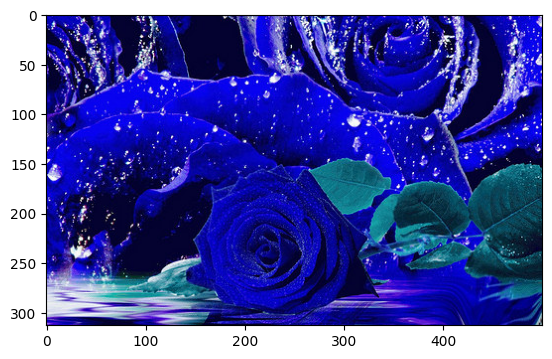

In [20]:
print(img.shape)
plt.imshow(img)

In [21]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [22]:
X, y = [], []

for flower_name, images in flower_images_dict.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
len(X_train)

2752

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

model.summary()


86/86 ━━━━━━━━━━━━━━━━━━━━ 90s 981ms/step - accuracy: 0.3446 - loss: 1.6636


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (32, 180, 180, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 90, 90, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 90, 90, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 45, 45, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 45, 45, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 22, 22, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 30976)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 5)                     │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

In [28]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.4742 - loss: 1.2542


[1.2213715314865112, 0.4727668762207031]

In [29]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step


array([[-0.74614316, -0.9245077 ,  0.21341062,  1.9942923 ,  0.55441576],
       [-1.8769637 , -1.943691  ,  0.87417954,  3.2281013 , -0.10036339],
       [-0.43949464,  1.6700176 ,  1.9271414 , -1.6484178 , -0.6276804 ],
       ...,
       [-1.1745545 , -1.962281  ,  0.20593826,  3.2452188 ,  0.43266618],
       [-1.7870408 , -1.9371325 ,  1.115007  ,  3.4146285 , -0.36862504],
       [-0.6134786 ,  0.6633157 ,  1.2412374 , -0.70650244, -0.29557297]],
      dtype=float32)

In [30]:
score = tf.nn.softmax(predictions[3])

In [31]:
np.argmax(score)

4

In [32]:
y_test[3]

4

In [33]:
score = tf.nn.softmax(predictions[2])
np.argmax(score)

2

In [34]:
y_test[2]

1

In [43]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

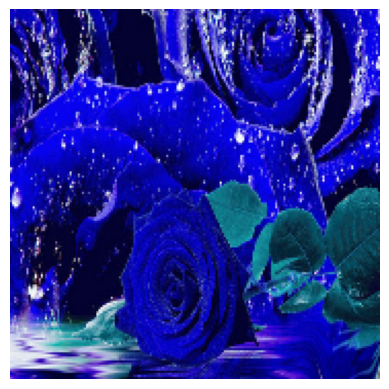

In [44]:
plt.axis('off')
plt.imshow(X[0])

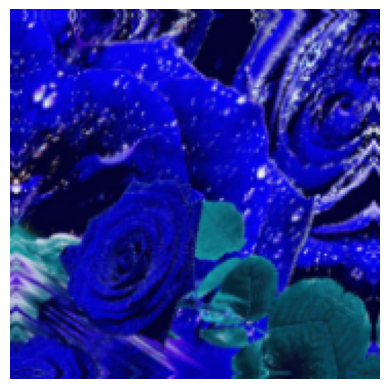

In [45]:
plt.axis('off')

plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [46]:
um_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

86/86 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.2463 - loss: 1.8832


In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.4762 - loss: 1.3067


[1.2625789642333984, 0.48583877086639404]